In [79]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
hfi = erk.get_hfi_returns()

C:\Users\m1852\python\py312\Scripts\edhec_risk_kit.py:31: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates = True)


In [11]:
# Semi-Deviation
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [17]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [20]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [ ]:
### VaR and CVaR

- Historical VaR
- Parametric VaR - Gaussian 
- Semi-parametric VaR - Modified Cornish_fisher VaR

In [21]:
import numpy as np

In [22]:
np.percentile(hfi,5)

-0.0274

In [23]:
np.percentile(hfi,5,axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [58]:
def var_historic(r, level = 5):
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level = level)
    elif isinstance(r, pd.Series):
        return np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [66]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [45]:
from scipy.stats import norm

In [46]:
z =  norm.ppf(0.05)
z

-1.6448536269514729

In [50]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [47]:
-(hfi.mean() + z*hfi.std(ddof = 0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [68]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [52]:
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [49]:
erk.var_gaussian(hfi, modified = True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

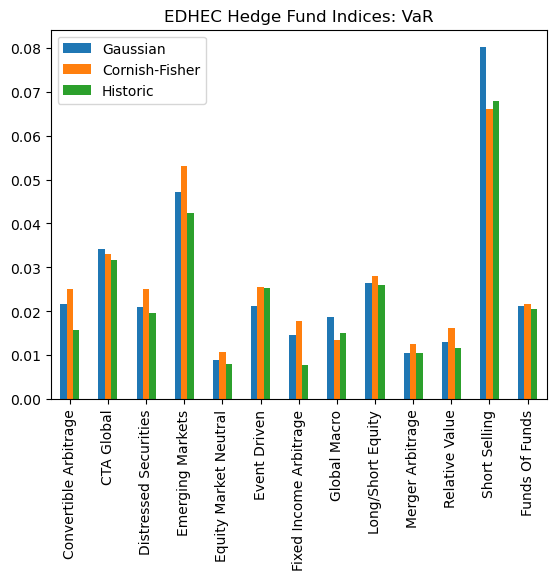

In [69]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified = True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis = 1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

In [ ]:
### BeyondVaR aka CVaR


In [80]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [105]:
me_m = pd.read_csv("data\Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col = 0, parse_dates = True, na_values = -99.99)
me_m.head()

C:\Users\m1852\AppData\Local\Temp\ipykernel_13440\2175194962.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("data\Portfolios_Formed_on_ME_monthly_EW.csv",header=0, index_col = 0, parse_dates = True, na_values = -99.99)


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [106]:
me_m = me_m[["Lo 20", "Hi 20"]]

In [111]:
returns = me_m/100
returns

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [112]:
n_months = returns.shape[0]
n_months

1110

In [113]:
return_per_month = (1+returns).prod()**(1/n_months)-1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [99]:
annualized_returns = (1+return_per_month)**12 - 1
annualized_returns

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [100]:
monthly_vol = returns.std()

Lo 20    0.097197
Hi 20    0.056325
dtype: float64

In [103]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [126]:
me_m = me_m[["Lo 20", "Hi 20"]]
me_m

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


In [134]:
returns02 = me_m.loc[199901:201512]/100
returns02



,Lo 20,Hi 20
199901,0.1114,0.0153
199902,-0.0399,-0.0172
199903,-0.0308,0.0368
199904,0.0824,0.0679
199905,0.0435,-0.0048
...,...,...
201508,-0.0347,-0.0559
201509,-0.0610,-0.0333
201510,0.0385,0.0710
201511,0.0165,0.0015


In [131]:
n_months02 = returns02.shape[0]

In [132]:
n_months02

204

In [142]:
monthly_returns02 = (1+returns02).prod()**(1/n_months02)-1
monthly_returns02

Lo 20    0.009069
Hi 20    0.005094
dtype: float64

In [143]:
annualized_returns02 = (1+monthly_returns02)**12 - 1

In [145]:
annualized_returns02

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [146]:
monthly_vol02 = returns02.std()
monthly_vol02

Lo 20    0.066076
Hi 20    0.049858
dtype: float64

In [147]:
annualzied_vol02 = monthly_vol02*np.sqrt(12)
annualzied_vol02

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

In [148]:
returns02.index

Index([199901, 199902, 199903, 199904, 199905, 199906, 199907, 199908, 199909,
       199910,
       ...
       201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511,
       201512],
      dtype='int64', length=204)

In [149]:
returns02.index = pd.to_datetime(returns02.index, format = "%Y%m")
returns02.index

DatetimeIndex(['1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=204, freq=None)

In [150]:
returns02.head()

,Lo 20,Hi 20
1999-01-01,0.1114,0.0153
1999-02-01,-0.0399,-0.0172
1999-03-01,-0.0308,0.0368
1999-04-01,0.0824,0.0679
1999-05-01,0.0435,-0.0048


In [160]:
wealth_index = 1000*(1+returns02['Hi 20']).cumprod()
wealth_index.head()

1999-01-01    1015.300000
1999-02-01     997.836840
1999-03-01    1034.557236
1999-04-01    1104.803672
1999-05-01    1099.500614
Name: Hi 20, dtype: float64

<Axes: >

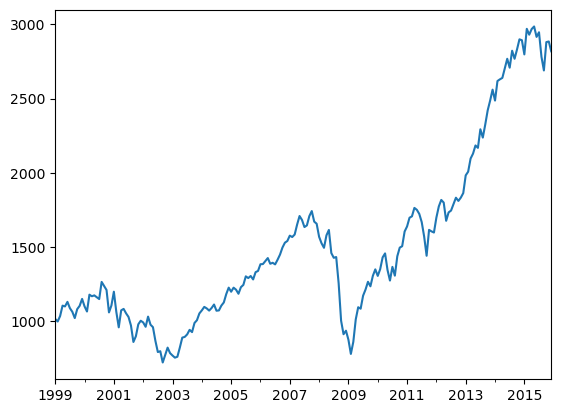

In [161]:
wealth_index.plot.line()

<Axes: >

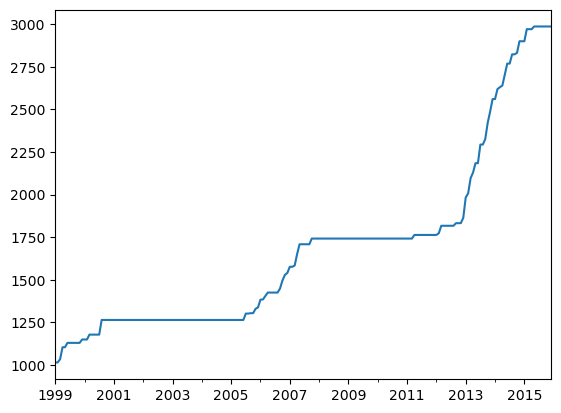

In [162]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

<Axes: >

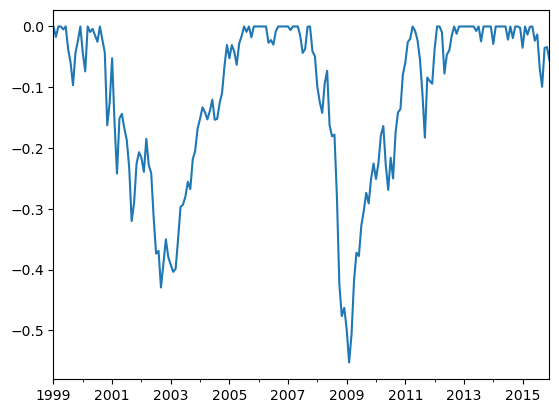

In [163]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [164]:
drawdown.head()

1999-01-01    0.0000
1999-02-01   -0.0172
1999-03-01    0.0000
1999-04-01    0.0000
1999-05-01   -0.0048
Name: Hi 20, dtype: float64

In [165]:
drawdown.min()

-0.5527349978713653

In [166]:
drawdown.idxmin(axis = 0)

Timestamp('2009-02-01 00:00:00')

In [172]:
edhec = pd.read_csv("data\edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates = True)
edhec.head()

C:\Users\m1852\AppData\Local\Temp\ipykernel_13440\2816530346.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  edhec = pd.read_csv("data\edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates = True)


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [173]:
hfi = edhec.loc['2009-01-31':'2018-12-31']
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01-31,4.91,-0.16,0.82,-1.12,0.79,1.32,1.12,0.29,-0.17,0.56,1.00,2.82,0.60
2009-02-28,1.64,-0.31,-1.22,-1.33,-0.46,-0.91,0.65,-0.55,-1.61,0.06,-0.16,3.28,-0.37
2009-03-31,2.35,-1.80,0.22,3.50,0.21,1.17,0.57,0.48,1.88,1.25,1.00,-4.62,0.08
2009-04-30,5.00,-1.40,3.87,6.63,-0.12,3.37,2.21,1.27,3.75,0.81,3.42,-8.20,0.92
2009-05-31,5.78,2.13,5.04,8.84,1.46,4.42,3.65,3.48,5.16,1.07,3.92,0.08,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-31,0.21,-0.58,0.93,0.40,-0.10,0.55,0.22,-0.14,0.67,-0.21,0.45,-0.52,0.18
2018-08-31,0.24,1.66,0.02,-2.77,0.04,0.11,0.17,-0.07,0.35,0.50,-0.02,-2.14,0.15
2018-09-30,0.34,-0.54,0.50,-1.10,-0.16,0.32,0.36,0.06,-0.23,0.28,0.18,0.36,-0.22


In [175]:
hfi_semideviation = hfi[hfi<0].std(ddof = 0)
hfi_semideviation

Convertible Arbitrage     0.668103
CTA Global                1.099578
Distressed Securities     0.949845
Emerging Markets          1.527598
Equity Market Neutral     0.518610
Event Driven              1.013464
Fixed Income Arbitrage    0.332054
Global Macro              0.507508
Long/Short Equity         1.213857
Merger Arbitrage          0.361121
Relative Value            0.571123
Short Selling             2.124006
Funds Of Funds            0.794842
dtype: float64

In [179]:
hfi_semideviation.idxmax()

'Short Selling'

In [182]:
hfi_semideviation.idxmin()

'Fixed Income Arbitrage'

In [185]:
demeaned_r = hfi-hfi.mean()
sigma_r = hfi.std(ddof = 0)
exp = (demeaned_r**3).mean()
skewness = exp / sigma_r**3
skewness

Convertible Arbitrage     1.305911
CTA Global                0.052062
Distressed Securities    -0.254944
Emerging Markets          0.033123
Equity Market Neutral    -0.896327
Event Driven             -0.488821
Fixed Income Arbitrage    1.121453
Global Macro              0.348184
Long/Short Equity        -0.463703
Merger Arbitrage         -0.551065
Relative Value            0.159953
Short Selling             0.456518
Funds Of Funds           -0.646908
dtype: float64

In [186]:
skewness.idxmin()

'Equity Market Neutral'

In [187]:
hfi02 = edhec.loc['2000-01-31':'2018-12-31']
demeaned_r = hfi02-hfi02.mean()
sigma_r = hfi02.std(ddof = 0)
exp = (demeaned_r**4).mean()
Kurtosis = exp / sigma_r**4
Kurtosis

Convertible Arbitrage     23.001449
CTA Global                 2.845022
Distressed Securities      6.231720
Emerging Markets           5.941289
Equity Market Neutral     20.329621
Event Driven               5.543444
Fixed Income Arbitrage    33.378729
Global Macro               3.653278
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Relative Value            12.731096
Short Selling              4.352758
Funds Of Funds             7.584725
dtype: float64

In [188]:
Kurtosis.idxmax()

'Fixed Income Arbitrage'